<p>
<img src="http://www.cerm.unifi.it/chianti/images/logo%20unifi_positivo.jpg" 
        alt="UniFI logo" style="float: left; width: 20%; height: 20%;">
<div align="right">
Massimo Nocentini<br>
<small>
<br>November 18, 2016: `log` $g$ poly
<br>November 16, 2016: `expt` $g$ poly and $H$ matrix
<br>November 9, 2016: splitting from "big" notebook
</small>
</div>
</p>
<br>
<br>
<div align="center">
<b>Abstract</b><br>
Theory of matrix functions, with applications to Pascal array $\mathcal{P}$.
</div>

In [91]:
from sympy import *
from sympy.abc import n, i, N, x, lamda, phi, z, j, r, k, a, alpha, beta

init_printing()

In [92]:
%run ../../src/matrix_functions.py
%run ../../src/commons.py
%run ../../src/sequences.py

# Pascal array $\mathcal{P}$

In [3]:
m=8

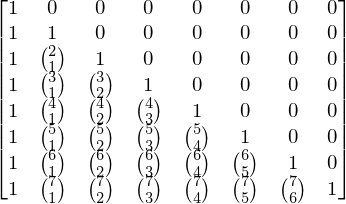

In [4]:
P_ = Matrix(m,m, lambda n,k: binomial(n, k, evaluate=k >= n or not k))
P_

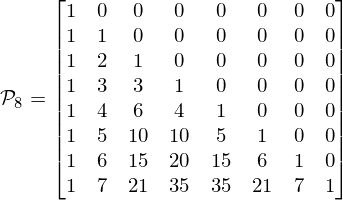

In [5]:
P =  Eq(Symbol(r'\mathcal{{P}}_{{ {} }}'.format(m)), Matrix(m,m,binomial), evaluate=False)
P

In [6]:
eigendata = spectrum(P)
eigendata

In [7]:
data, eigenvals, multiplicities = eigendata.rhs

In [8]:
Phi_poly = Phi_poly_ctor(deg=m-1)
Phi_poly

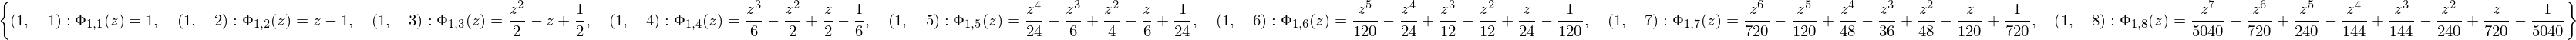

In [9]:
Phi_polynomials = component_polynomials(eigendata, early_eigenvals_subs=True)
Phi_polynomials

In [17]:
cmatrices = component_matrices(P, Phi_polynomials)
#list(cmatrices.values())

In [11]:
a = IndexedBase('a')
aeq = Eq(a[n], n+a[n-1])
b = Function('b')
beq = Eq(b(n), n+b(n-1))

with lift_to_Lambda(aeq, return_eq=True) as aEQ, lift_to_Lambda(beq, return_eq=True) as bEQ:
    arec = aEQ(n+1)
    brec = bEQ(n+1)
    
arec, brec

## `power` function

In [93]:
f = Function('P')
f_power = define(let=f(z), be=z**r)
f_power

In [94]:
g_power = Hermite_interpolation_polynomial(f_power, eigendata, Phi_polynomials)
#g_power.simplify() # too verbose and complex to display

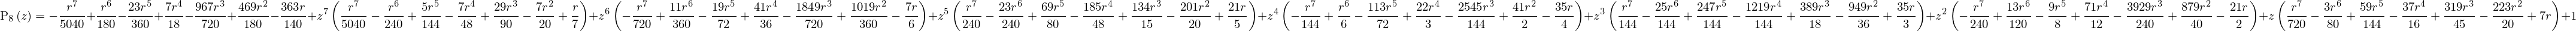

In [95]:
g_power = g_power.subs(eigenvals)
g_power

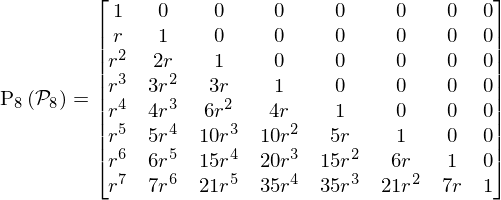

In [96]:
with lift_to_matrix_function(g_power) as G_power:
    m_power = G_power(P)
m_power

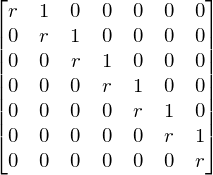

In [97]:
production_matrix(m_power.rhs)

In [98]:
assert m_power.rhs == (P.rhs**r).applyfunc(simplify)

## `inverse` function

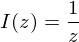

In [31]:
f, h = Function('I'), Function('h')
f_inverse = define(let=f(z), be=1/(z))
f_inverse

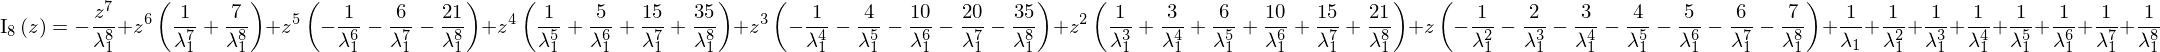

In [49]:
g_inverse = Hermite_interpolation_polynomial(f_inverse, eigendata, Phi_polynomials)
g_inverse

In [50]:
g_inverse = g_inverse.subs(eigenvals)
g_inverse

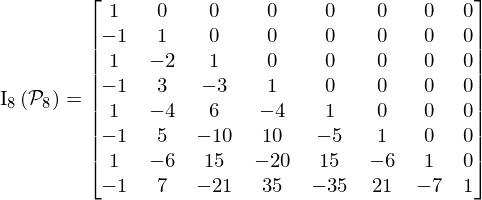

In [51]:
with lift_to_matrix_function(g_inverse) as G_inverse:
    P_inverse = G_inverse(P)
P_inverse

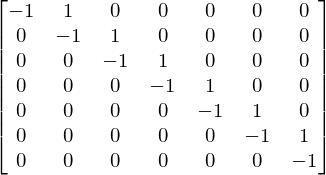

In [52]:
production_matrix(P_inverse.rhs)

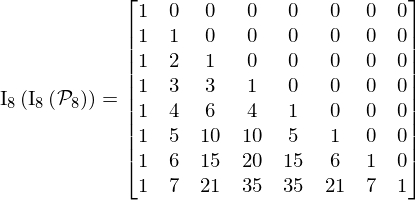

In [53]:
G_inverse(P_inverse)

In [70]:
assert (P_inverse.rhs * P.rhs) == Matrix(m, m, identity_matrix())
assert P_inverse.rhs == P.rhs**(-1)
assert P_inverse.rhs == m_power.rhs.subs({r:-1})

## `sqrt` function

In [99]:
f = Function('R')
f_sqrt = define(let=f(z), be=sqrt(z))
f_sqrt

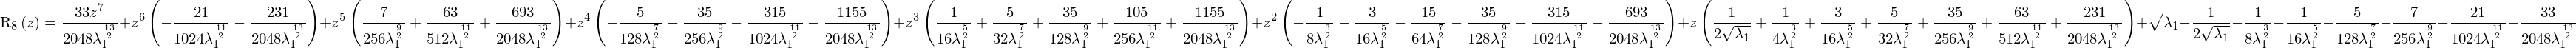

In [100]:
g_sqrt = Hermite_interpolation_polynomial(f_sqrt, eigendata, Phi_polynomials)
g_sqrt

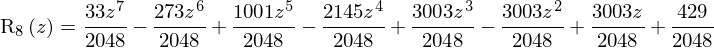

In [101]:
g_sqrt = g_sqrt.subs(eigenvals)
g_sqrt

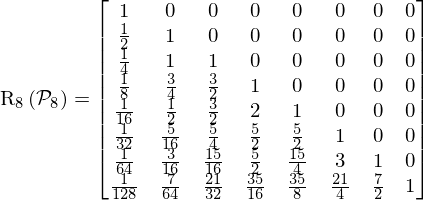

In [102]:
with lift_to_matrix_function(g_sqrt) as G_sqrt:
    m_sqrt = G_sqrt(P)
m_sqrt

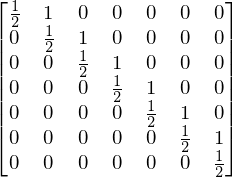

In [103]:
production_matrix(m_sqrt.rhs)

In [104]:
assert m_sqrt.rhs == P.rhs**(S(1)/2)
assert m_sqrt.rhs == m_power.rhs.subs({r:S(1)/2})

## `expt` function

In [105]:
f = Function('E')
f_expt = define(let=f(z), be=exp(alpha*z))
f_expt

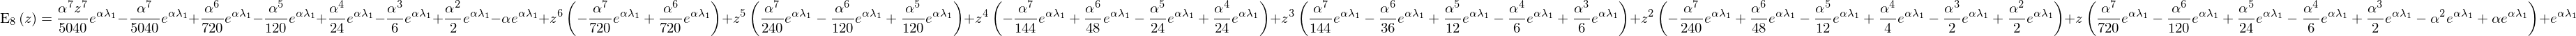

In [106]:
g_expt = Hermite_interpolation_polynomial(f_expt, eigendata, Phi_polynomials)
g_expt

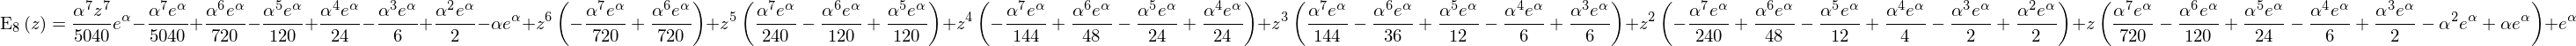

In [107]:
g_expt = g_expt.subs(eigenvals)
g_expt

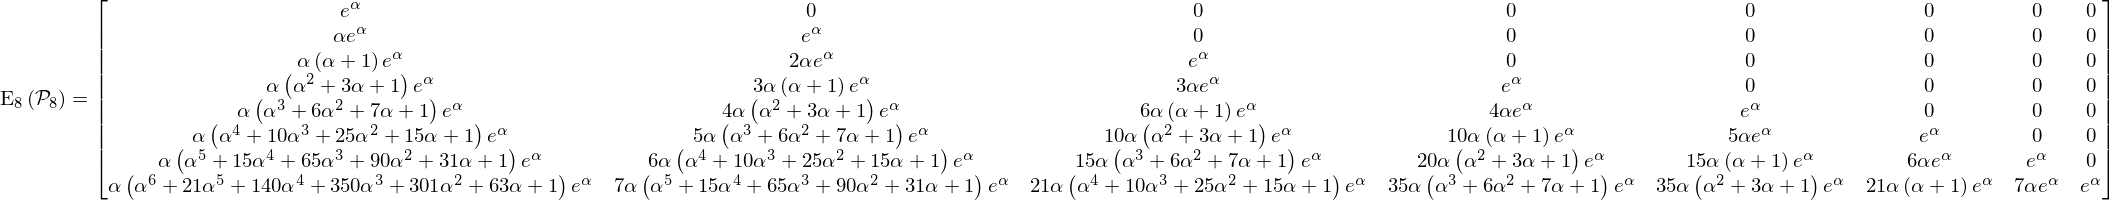

In [108]:
with lift_to_matrix_function(g_expt) as G_expt:
    P_expt = G_expt(P)
P_expt

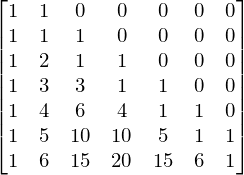

In [110]:
production_matrix(P_expt.rhs).subs({alpha:1})

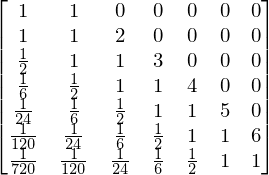

In [111]:
production_matrix(P_expt.rhs, exp=True).subs({alpha:1})

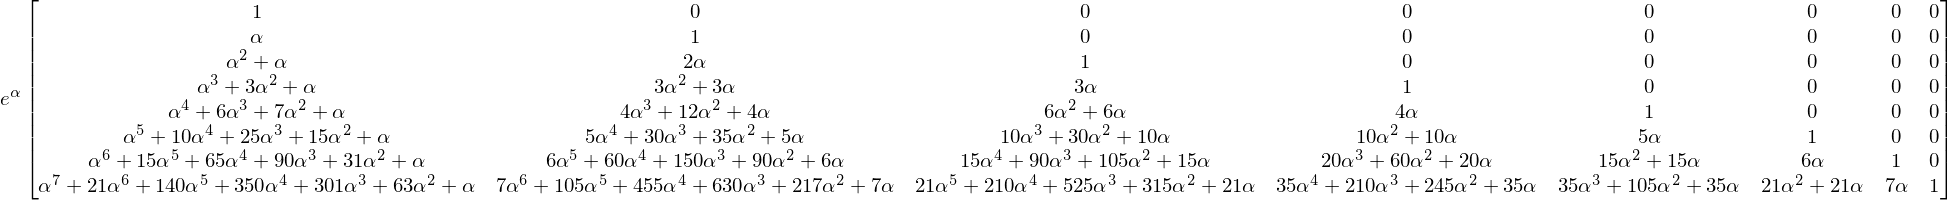

In [113]:
simp_P_expt = Mul(exp(alpha), P_expt.rhs.applyfunc(lambda c: (c/exp(alpha)).expand()), evaluate=False)
simp_P_expt

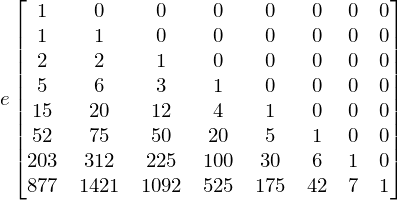

In [114]:
simp_P_expt.subs({alpha:1})

In [115]:
from sympy.functions.combinatorial.numbers import stirling

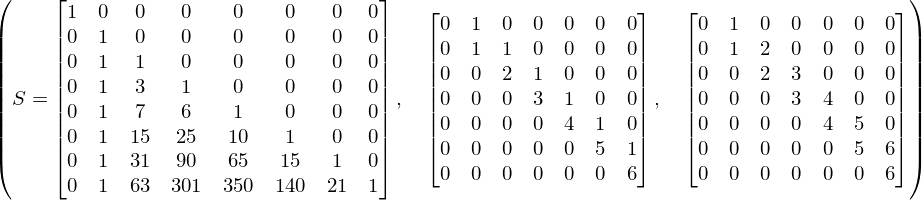

In [122]:
S = Matrix(m, m, lambda n,k: stirling(n,k, kind=2))
Eq(Symbol('S'), S, evaluate=False), production_matrix(S), production_matrix(S, exp=True)

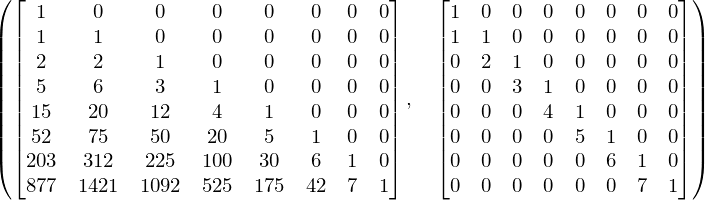

In [123]:
S*P.rhs*S**(-1), S**(-1)*P.rhs*S

## `log` function

In [124]:
f = Function('L')
f_log = define(let=f(z), be=log(z))
f_log

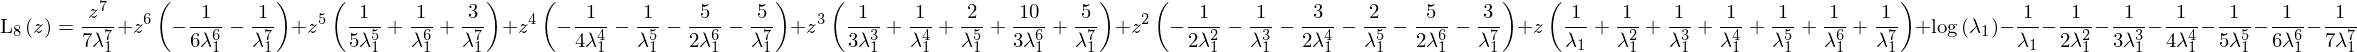

In [125]:
g_log = Hermite_interpolation_polynomial(f_log, eigendata, Phi_polynomials)
g_log

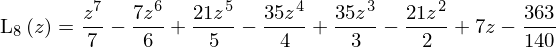

In [126]:
g_log = g_log.subs(eigenvals)
g_log

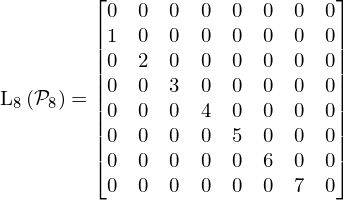

In [127]:
with lift_to_matrix_function(g_log) as G_log:
    P_log = G_log(P)
P_log

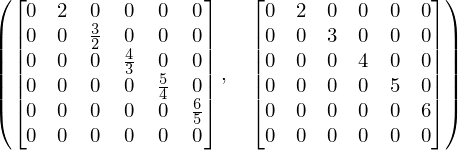

In [131]:
production_matrix(P_log.rhs[1:,:-1]), production_matrix(P_log.rhs[1:,:-1], exp=True)

## `Mobius` function

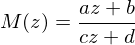

In [150]:
f = Function('M')
a,b,c,d = symbols('a b c d')
f_mobius = define(let=f(z), be=(a*z+b)/(c*z+d))
f_mobius

In [158]:
g_mobius = Hermite_interpolation_polynomial(f_mobius, eigendata, Phi_polynomials)
#g_mobius.simplify() # too verbose and complex to display

In [160]:
g_mobius = g_mobius.subs(eigenvals)
#g_mobius # too verbose to show here

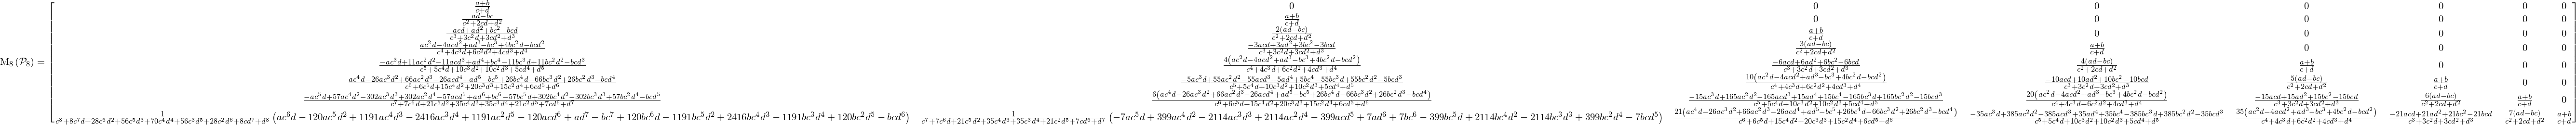

In [162]:
with lift_to_matrix_function(g_mobius) as G_mobius:
    m_mobius = G_mobius(P)

m_mobius

## `sin` function

In [132]:
f = Function('S')
f_sin = define(let=f(z), be=sin(z))
f_sin

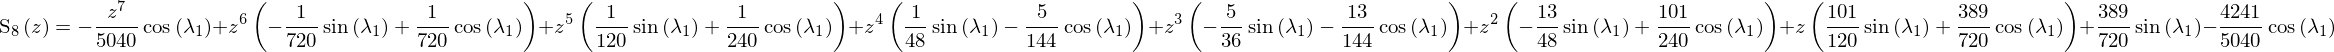

In [133]:
g_sin = Hermite_interpolation_polynomial(f_sin, eigendata, Phi_polynomials)
g_sin

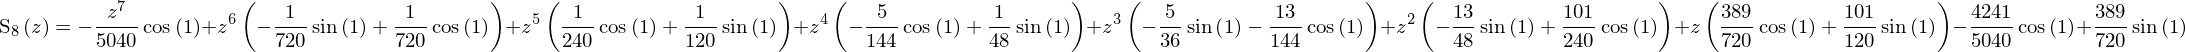

In [137]:
g_sin = g_sin.subs(eigenvals)
g_sin#, g_sin.trigsimp(), g_sin.simplify()

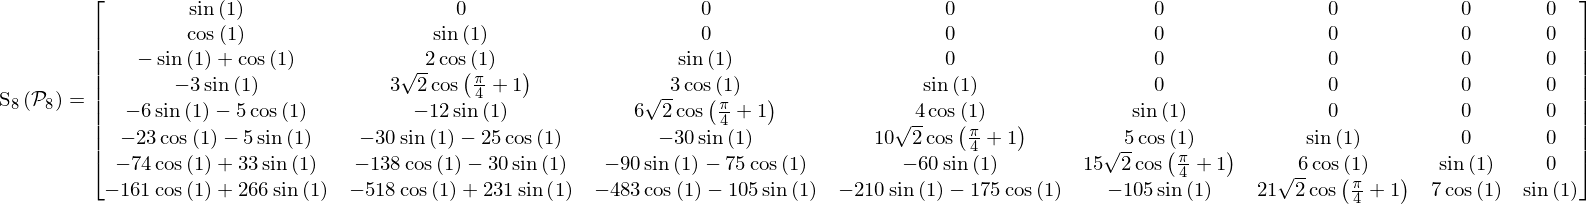

In [140]:
with lift_to_matrix_function(g_sin) as G_sin:
    P_sin = G_sin(P)
    
P_sin

In [ ]:
production_matrix(P_sin.rhs).applyfunc(simplify) # takes long to evaluate

## `cos` function

In [142]:
f = Function('C')
f_cos = define(let=f(z), be=cos(z))
f_cos

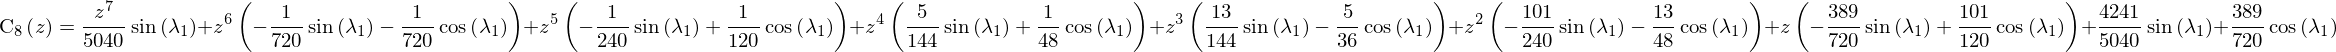

In [143]:
g_cos = Hermite_interpolation_polynomial(f_cos, eigendata, Phi_polynomials)
g_cos

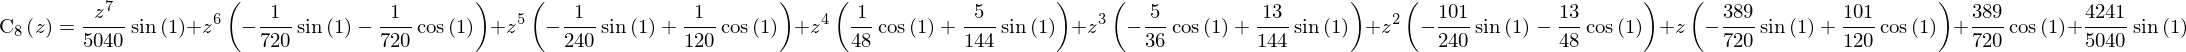

In [144]:
g_cos = g_cos.subs(eigenvals)
g_cos#, g_cos.trigsimp(), g_cos.simplify()

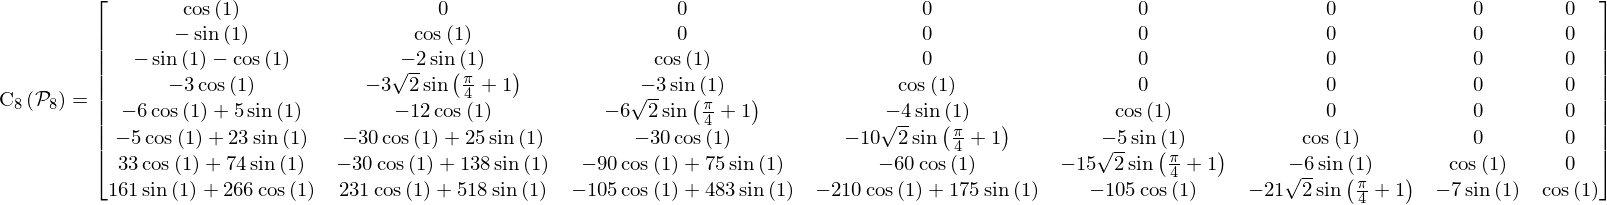

In [145]:
with lift_to_matrix_function(g_cos) as G_cos:
    P_cos = G_cos(P)
    
P_cos

In [ ]:
production_matrix(P_sin).applyfunc(simplify) # takes long to evaluate

In [148]:
assert (P_sin.rhs**2 + P_cos.rhs**2).applyfunc(trigsimp) == Matrix(m,m, identity_matrix())

---
<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.